# 데이터 전처리

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [191]:
# 데이터 확인
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [193]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [344]:
for data_single in data.groupby('Outcome')['Glucose'].transform('median'):
    data['Glucose'].replace({0:data_single}, inplace = True)
    
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [195]:
data[data['BloodPressure']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [205]:
for data_single in data.groupby('Outcome')['BloodPressure'].transform('median'):
    data['BloodPressure'].replace({0:data_single}, inplace = True)

In [196]:
data[data['SkinThickness']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


In [206]:
for data_single in data.groupby('Outcome')['SkinThickness'].transform('median'):
    data['SkinThickness'].replace({0:data_single}, inplace = True)

In [197]:
data[data['Insulin']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [207]:
for data_single in data.groupby('Outcome')['Insulin'].transform('median'):
    data['Insulin'].replace({0:data_single}, inplace = True)

In [208]:
data[data['BMI']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96.0,27.0,39.0,0.0,0.232,54,1
49,7,105.0,74.0,27.0,39.0,0.0,0.305,24,0
60,2,84.0,74.0,27.0,39.0,0.0,0.304,21,0
81,2,74.0,74.0,27.0,39.0,0.0,0.102,22,0
145,0,102.0,75.0,23.0,39.0,0.0,0.572,21,0


In [209]:
for data_single in data.groupby('Outcome')['BMI'].transform('median'):
    data['BMI'].replace({0:data_single}, inplace = True)

In [198]:
data[data['Age']==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [210]:
# 입/출력 값 나눔
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [211]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,39.0,33.6,0.627,50
1,1,85.0,66.0,29.0,39.0,26.6,0.351,31
2,8,183.0,64.0,27.0,39.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [212]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [213]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [214]:
len(x_train)

614

In [215]:
len(y_train)

614

In [216]:
len(x_test)

154

In [217]:
len(y_test)

154

In [218]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [219]:
x_train = scaler.fit_transform(x_train)
x_y_train = scaler.fit_transform(y_train)

In [220]:
x_train[:3]

array([[0.        , 0.65806452, 0.43478261, 0.35714286, 0.03004808,
        0.40286299, 0.10702055, 0.1372549 ],
       [0.        , 0.47096774, 0.39130435, 0.42857143, 0.20913462,
        0.25766871, 0.17508562, 0.01960784],
       [0.        , 0.49677419, 0.39130435, 0.41071429, 0.18149038,
        0.32924335, 0.05094178, 0.23529412]])

In [307]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 신경망 모델

In [527]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [528]:
model = keras.models.Sequential([
    keras.layers.Dense(64),
    keras.layers.Dense(512, activation = 'tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation = 'tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# 컴파일

In [529]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 학습

In [530]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs = 500, batch_size = 10,
                   callbacks=[early_stop]) 

Epoch 1/500
62/62 [==============================] - 2s 10ms/step - loss: 0.6698 - accuracy: 0.6075 - val_loss: 0.7937 - val_accuracy: 0.5325
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.6987 - val_loss: 2.6600 - val_accuracy: 0.3636
Epoch 3/500
62/62 [==============================] - 0s 5ms/step - loss: 0.5378 - accuracy: 0.7362 - val_loss: 3.2568 - val_accuracy: 0.3571
Epoch 4/500
62/62 [==============================] - 0s 5ms/step - loss: 0.5297 - accuracy: 0.7557 - val_loss: 3.0494 - val_accuracy: 0.3571
Epoch 5/500
62/62 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.7606 - val_loss: 2.9109 - val_accuracy: 0.3636
Epoch 6/500
62/62 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7638 - val_loss: 3.1137 - val_accuracy: 0.3636
Epoch 7/500
62/62 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.7655 - val_loss: 2.9261 - val_accuracy: 0.3636
Epoch 8/500


# 모델 구조(시각화)

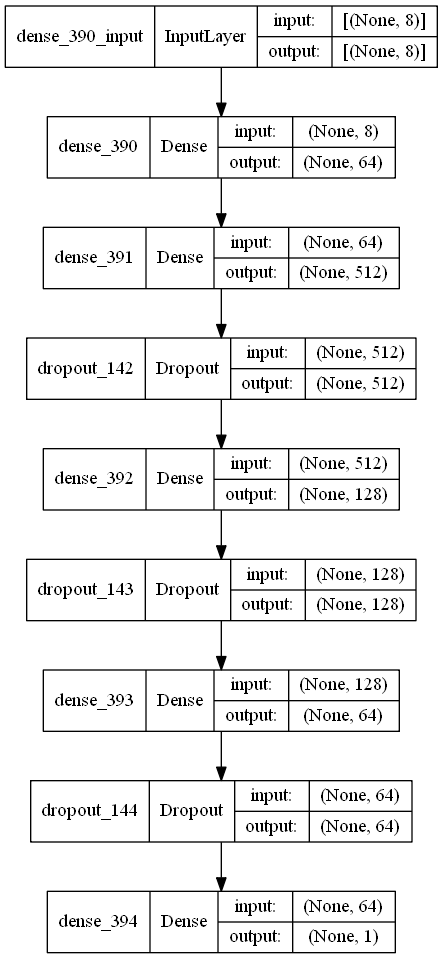

In [520]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# 학습결과

In [521]:
import matplotlib.pyplot as plt

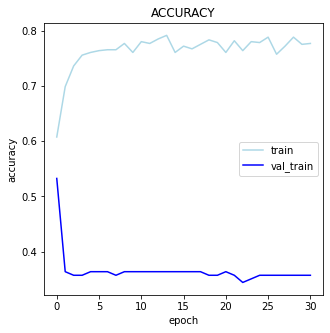

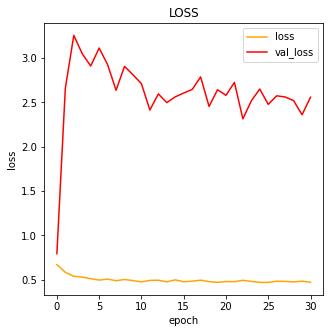

In [531]:
train_history = history.history['accuracy']
validation_history = history.history['val_accuracy']

fig = plt.figure(figsize = (5,5))
plt.title('ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.plot(train_history, 'lightblue', label = 'train')
plt.plot(validation_history, 'blue', label = 'val_train')
plt.legend()

plt.show()


train_history = history.history['loss']
validation_history = history.history['val_loss']

fig = plt.figure(figsize = (5,5))
plt.title('LOSS')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(train_history, 'orange', label = 'loss')
plt.plot(validation_history, 'red', label = 'val_loss')
plt.legend()

plt.show()